In [1]:
# 1. GEREKLİ KÜTÜPHANELER
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 2. VERİYİ YÜKLE
df = pd.read_csv("C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv")

# 3. İLK İNCELEME
print(df.shape)
print(df.columns)
print(df.isnull().sum())
df.describe()

(130663, 17)
Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')
artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [2]:
from scipy.stats import zscore

numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_cols]))
outliers = (z_scores > 3).sum()
print("Uç değer sayısı:\n", dict(zip(numeric_cols, outliers)))


Uç değer sayısı:
 {'acousticness': 0, 'danceability': 292, 'duration_ms': 1225, 'energy': 0, 'instrumentalness': 0, 'key': 0, 'liveness': 3749, 'loudness': 2499, 'mode': 0, 'speechiness': 2247, 'tempo': 400, 'time_signature': 2048, 'valence': 0, 'popularity': 250}


In [3]:
from scipy import stats

# Sayısal sütunları seç
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Her sütun için normal dağılım testi
for col in numeric_cols:
    clean_data = df[col].dropna()
    if len(clean_data) > 7:  # Normaltest için minimum veri
        stat, p = stats.normaltest(clean_data)
        print(f"{col} için p-değeri: {p:.4f} {'(Normal dağılım olabilir)' if p > 0.05 else '(Normal değil)'}")
    else:
        print(f"{col}: Veri sayısı normal test için yetersiz.")


acousticness için p-değeri: 0.0000 (Normal değil)
danceability için p-değeri: 0.0000 (Normal değil)
duration_ms için p-değeri: 0.0000 (Normal değil)
energy için p-değeri: 0.0000 (Normal değil)
instrumentalness için p-değeri: 0.0000 (Normal değil)
key için p-değeri: 0.0000 (Normal değil)
liveness için p-değeri: 0.0000 (Normal değil)
loudness için p-değeri: 0.0000 (Normal değil)
mode için p-değeri: 0.0000 (Normal değil)
speechiness için p-değeri: 0.0000 (Normal değil)
tempo için p-değeri: 0.0000 (Normal değil)
time_signature için p-değeri: 0.0000 (Normal değil)
valence için p-değeri: 0.0000 (Normal değil)
popularity için p-değeri: 0.0000 (Normal değil)


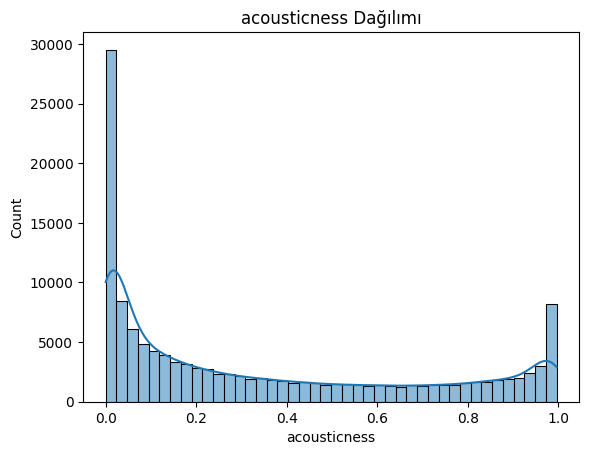

acousticness için p-değeri: 0.0000 (Normal değil)


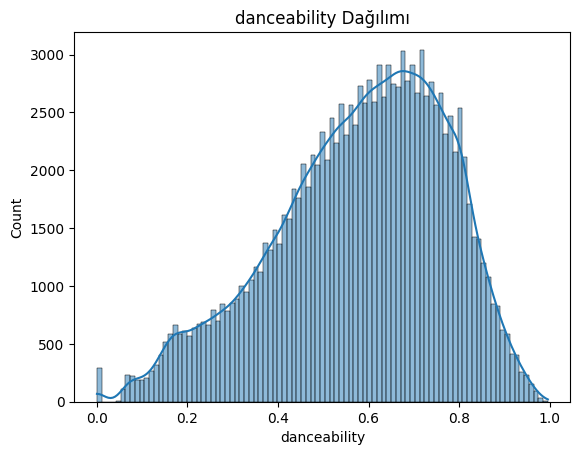

danceability için p-değeri: 0.0000 (Normal değil)


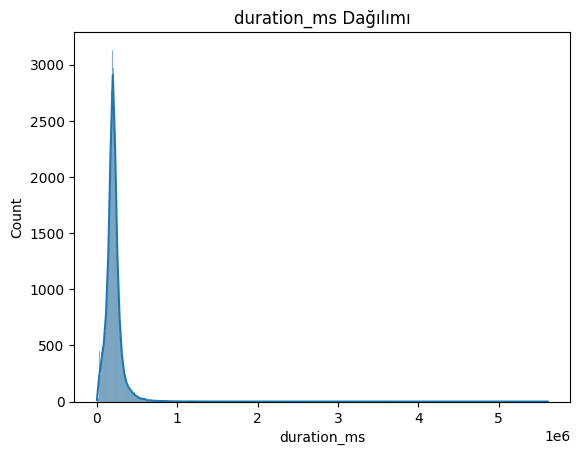

duration_ms için p-değeri: 0.0000 (Normal değil)


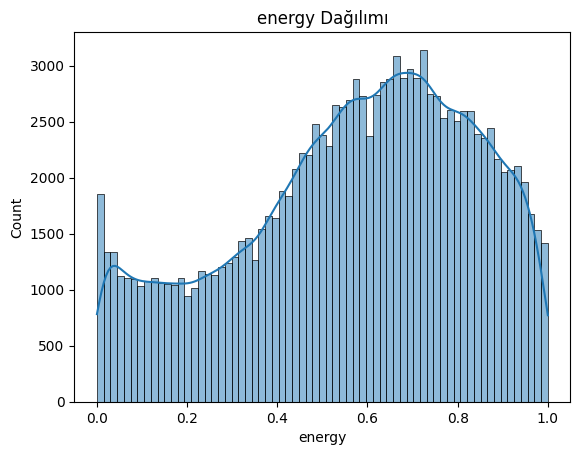

energy için p-değeri: 0.0000 (Normal değil)


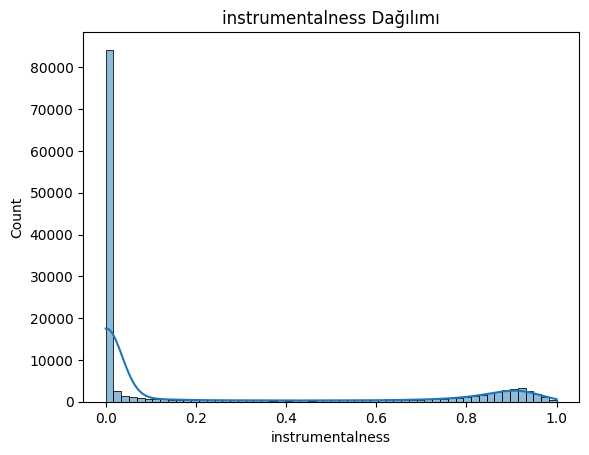

instrumentalness için p-değeri: 0.0000 (Normal değil)


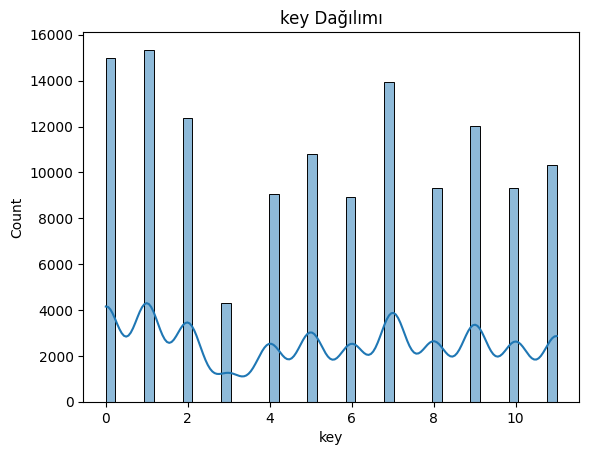

key için p-değeri: 0.0000 (Normal değil)


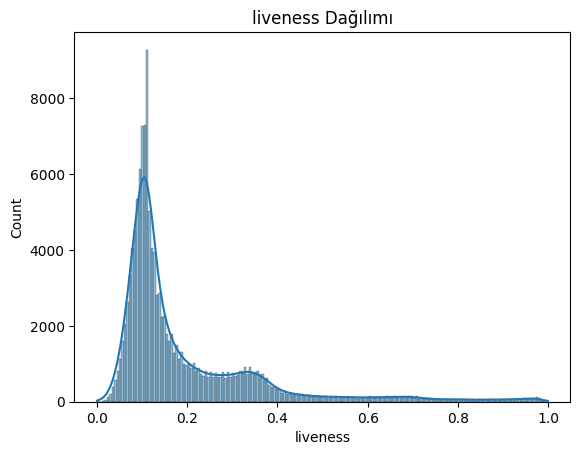

liveness için p-değeri: 0.0000 (Normal değil)


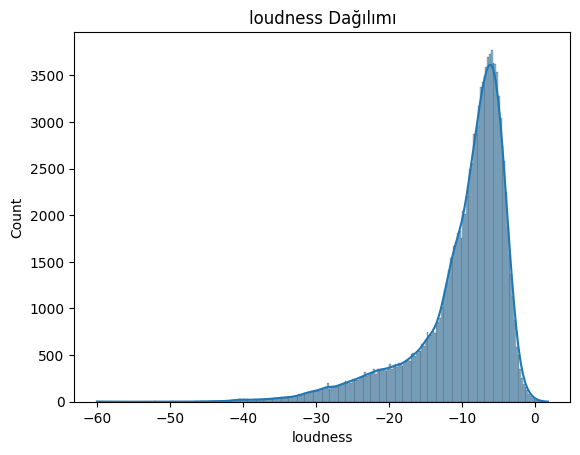

loudness için p-değeri: 0.0000 (Normal değil)


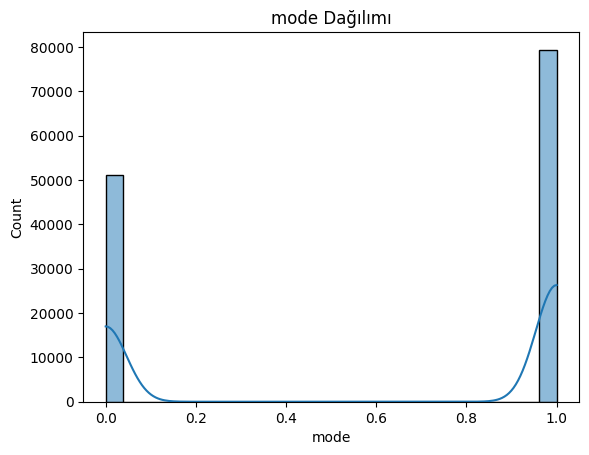

mode için p-değeri: 0.0000 (Normal değil)


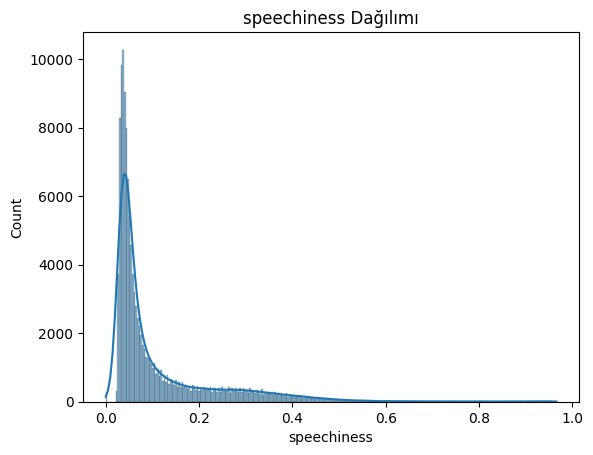

speechiness için p-değeri: 0.0000 (Normal değil)


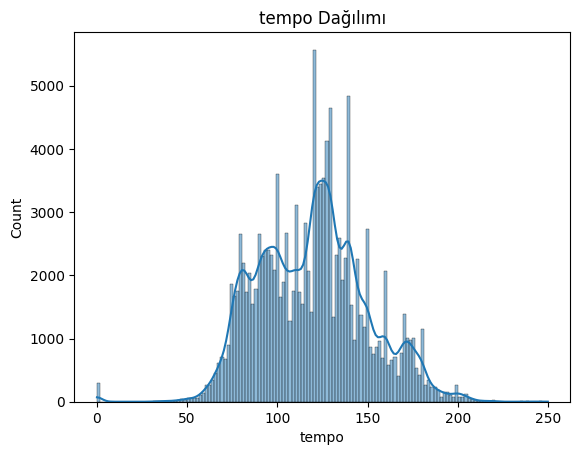

tempo için p-değeri: 0.0000 (Normal değil)


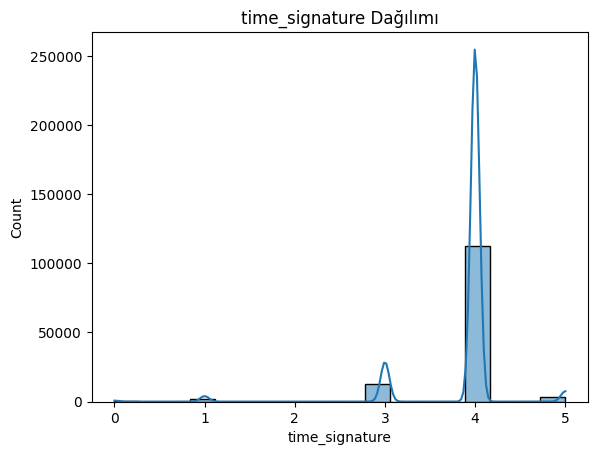

time_signature için p-değeri: 0.0000 (Normal değil)


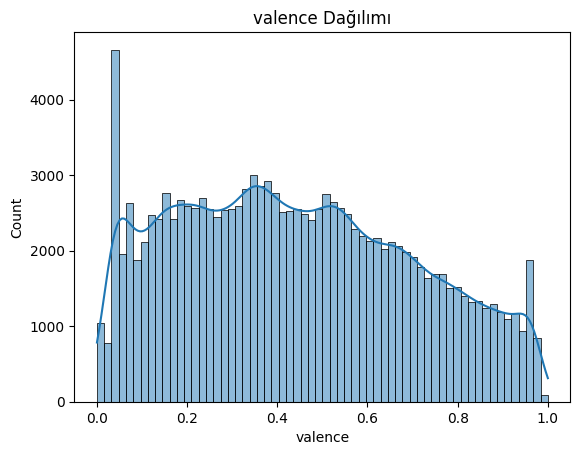

valence için p-değeri: 0.0000 (Normal değil)


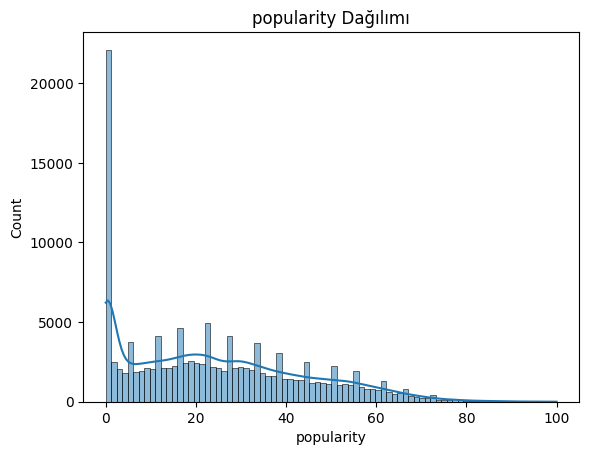

popularity için p-değeri: 0.0000 (Normal değil)


In [4]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Dağılımı")
    plt.show()

    stat, p = stats.normaltest(df[col].dropna())
    print(f"{col} için p-değeri: {p:.4f} {'(Normal dağılım olabilir)' if p > 0.05 else '(Normal değil)'}")


C:\Users\Tuna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


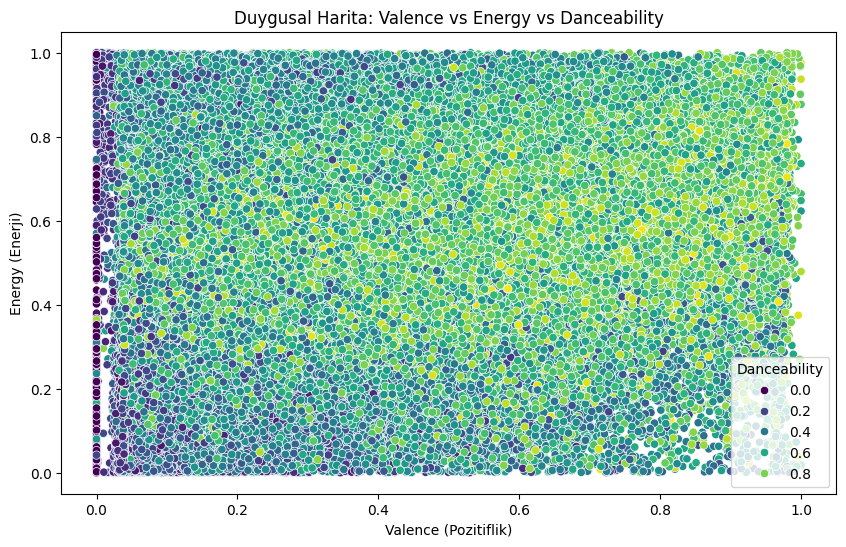

C:\Users\Tuna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


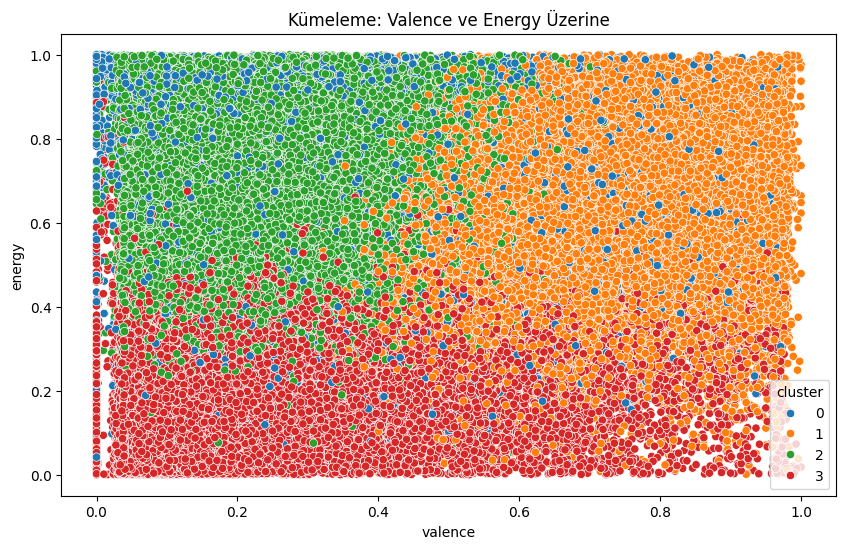

In [5]:
# 5. DUYGU HARİTASI: VALENCE vs ENERGY
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="valence", y="energy", hue="danceability", palette="viridis")
plt.title("Duygusal Harita: Valence vs Energy vs Danceability")
plt.xlabel("Valence (Pozitiflik)")
plt.ylabel("Energy (Enerji)")
plt.legend(title="Danceability")
plt.show()

# 6. K-MEANS KÜMELEME
features = df[["acousticness", "danceability", "energy", "valence", "liveness"]]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled)

# Küme görselleştirme (valence vs energy)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="valence", y="energy", hue="cluster", palette="tab10")
plt.title("Kümeleme: Valence ve Energy Üzerine")
plt.show()

In [6]:
# Kullanacağımız özellikler
feature_cols = ["acousticness", "danceability", "energy", "valence", "liveness"]

# Özellikleri ölçekle (bunu bir kere yap)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_cols])
for i, col in enumerate(feature_cols):
    df[col + "_scaled"] = scaled_features[:, i]

In [7]:
def compare_songs(song1, song2, feature_cols):
    song1_vals = [song1[col] for col in feature_cols]
    song2_vals = [song2[col] for col in feature_cols]

    x = range(len(feature_cols))

    plt.figure(figsize=(10, 6))
    plt.bar(x, song1_vals, width=0.4, label=f"{song1['track_name']} - {song1['artist_name']}", align='center')
    plt.bar([i + 0.4 for i in x], song2_vals, width=0.4, label=f"{song2['track_name']} - {song2['artist_name']}", align='center')
    plt.xticks([i + 0.2 for i in x], feature_cols)
    plt.ylabel("Özellik Değeri")
    plt.title("Şarkı Özellik Karşılaştırması")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [8]:
def find_most_similar_song_by_name(song_name, artist_name=None, popularity_threshold=50):
    print("np türü:", type(np))  # hata ayıklama

    if artist_name:
        candidates = df[(df["track_name"].str.lower() == song_name.lower()) &
                        (df["artist_name"].str.lower() == artist_name.lower())]
    else:
        candidates = df[df["track_name"].str.lower() == song_name.lower()]

    if candidates.empty:
        print("Şarkı ismine tam eşleşme bulunamadı, en yakın isimli şarkı aranıyor...")
        candidates = df[df["track_name"].str.lower().str.contains(song_name.lower(), na=False)]

        if candidates.empty:
            print("Hiç benzer isimli şarkı bulunamadı.")
            return None

    song = candidates.iloc[0]
    print(f"Bulunan şarkı: '{song['track_name']}' - {song['artist_name']}'")

    song_features = song[[col + "_scaled" for col in feature_cols]].to_numpy().ravel()
    all_features = df[[col + "_scaled" for col in feature_cols]].to_numpy()

    # Tüm satırlar için mesafeleri hesapla
    diff = all_features - song_features
    squared_diff = diff ** 2
    summed = np.sum(squared_diff, axis=1)
    distances = np.power(summed, 0.5)  # np.sqrt yerine daha güvenli

    # Şarkının kendisini dışla
    distances[song.name] = np.inf

    # Uygun popülerliğe sahip en yakın şarkıyı bulana kadar döngü
    sorted_indices = np.argsort(distances)
    for idx in sorted_indices:
        candidate_song = df.loc[idx]
        if candidate_song['popularity'] >= popularity_threshold:
            print("\nÖzelliklerine en çok benzeyen (popülerlik eşiğini sağlayan) şarkı:")
            print(f"Şarkı: '{candidate_song['track_name']}'")
            print(f"Sanatçı: {candidate_song['artist_name']}")
            print(f"Popülerlik: {candidate_song['popularity']}")
            print("Özellikler:")
            for col in feature_cols:
                print(f"  {col}: {candidate_song[col]:.3f}")
            compare_songs(song, candidate_song, feature_cols)
            return candidate_song

    print("Hiçbir şarkı belirtilen popülerlik eşiğini karşılamıyor.")
    return None


np türü: <class 'module'>
Şarkı ismine tam eşleşme bulunamadı, en yakın isimli şarkı aranıyor...
Bulunan şarkı: 'Sweet Revenge' - John Prine'

Özelliklerine en çok benzeyen (popülerlik eşiğini sağlayan) şarkı:
Şarkı: 'La Ladrona'
Sanatçı: Fuerza Regida
Popülerlik: 55
Özellikler:
  acousticness: 0.621
  danceability: 0.553
  energy: 0.391
  valence: 0.857
  liveness: 0.313


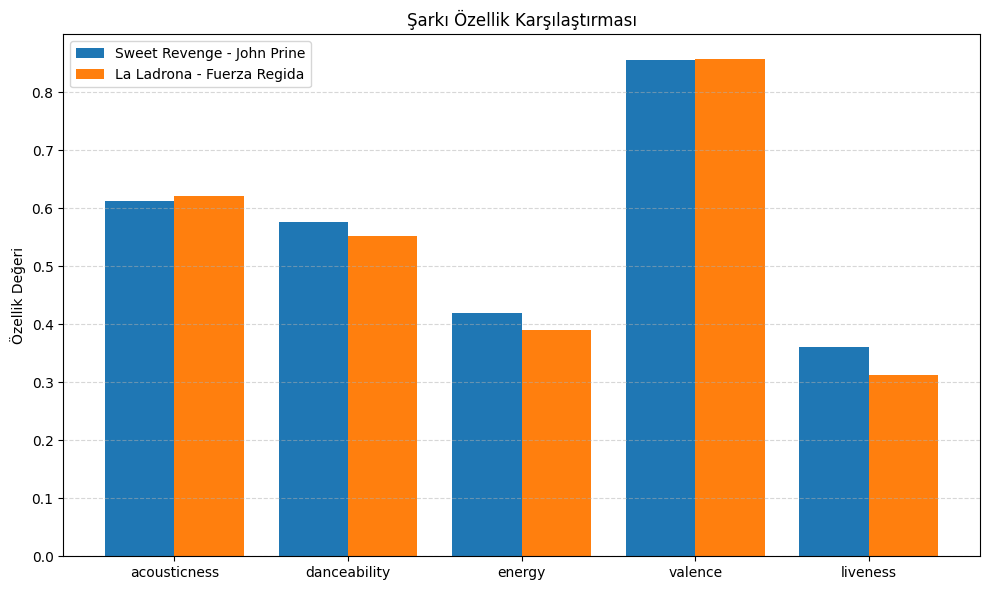

artist_name                     Fuerza Regida
track_id               35PsCVG6oj3RckIOxUvDde
track_name                         La Ladrona
acousticness                            0.621
danceability                            0.553
duration_ms                            197627
energy                                  0.391
instrumentalness                          0.0
key                                         0
liveness                                0.313
loudness                               -4.964
mode                                        1
speechiness                            0.0523
tempo                                 139.965
time_signature                              4
valence                                 0.857
popularity                                 55
cluster                                     1
acousticness_scaled                  0.805752
danceability_scaled                 -0.149773
energy_scaled                       -0.684551
valence_scaled                    

In [9]:
find_most_similar_song_by_name("Revenge", artist_name="XXXTENTACION", popularity_threshold=50)


C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


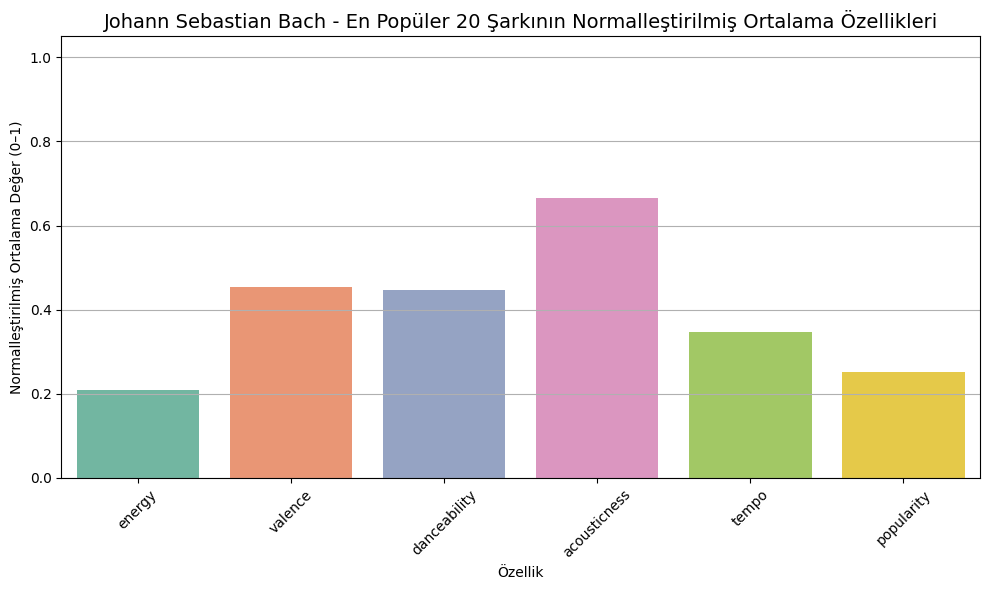

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


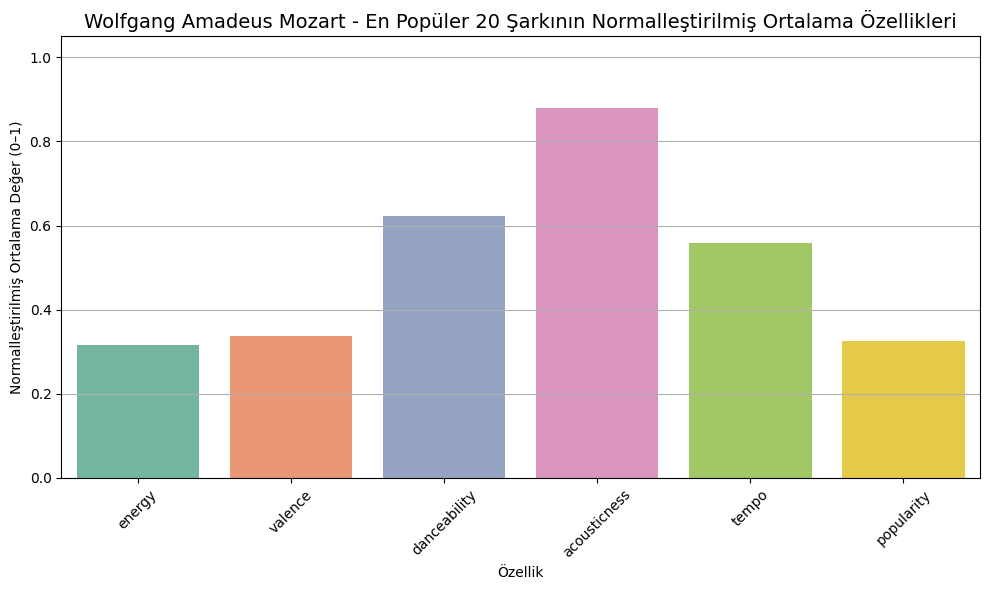

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


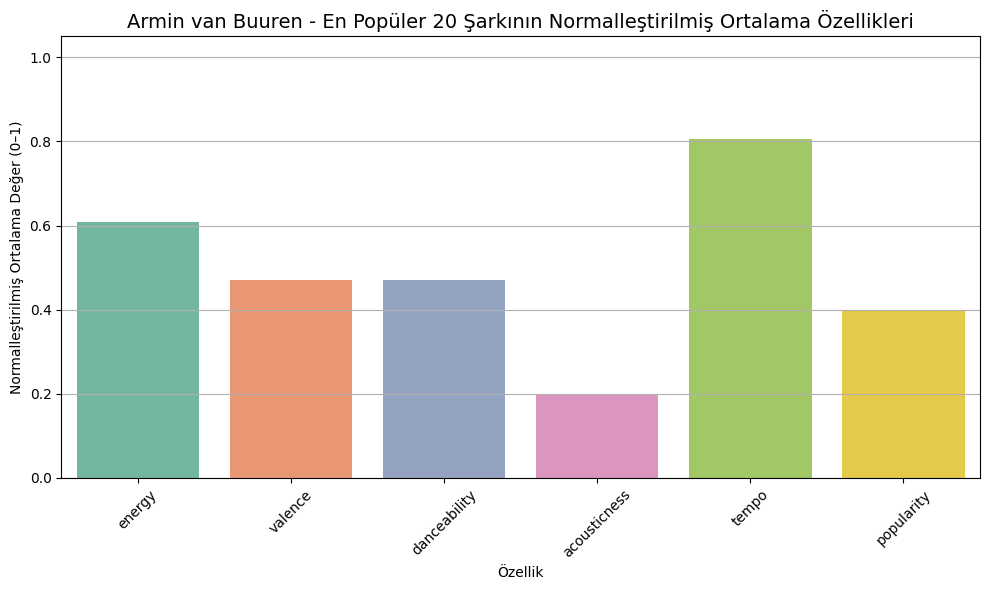

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


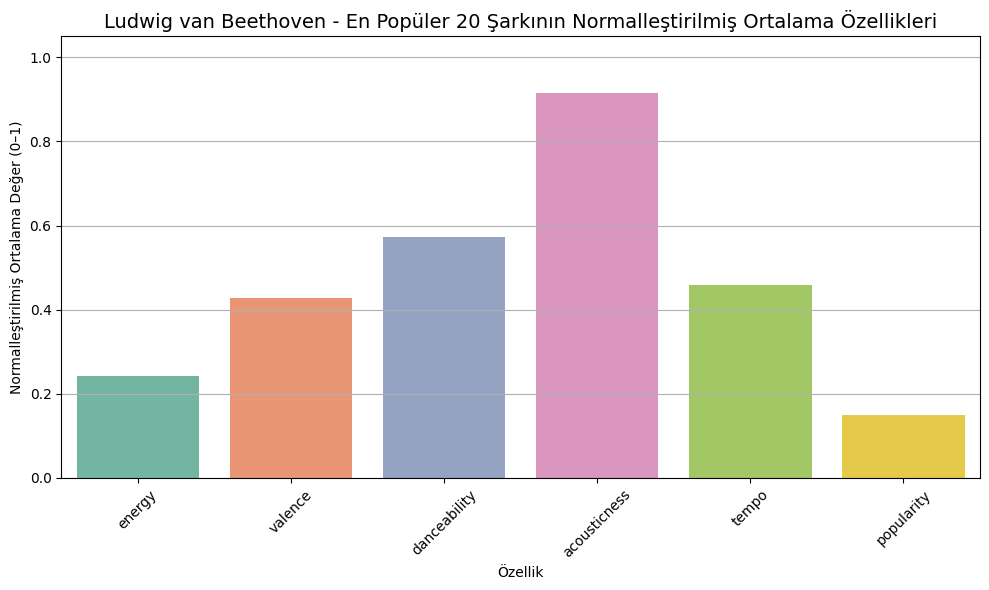

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


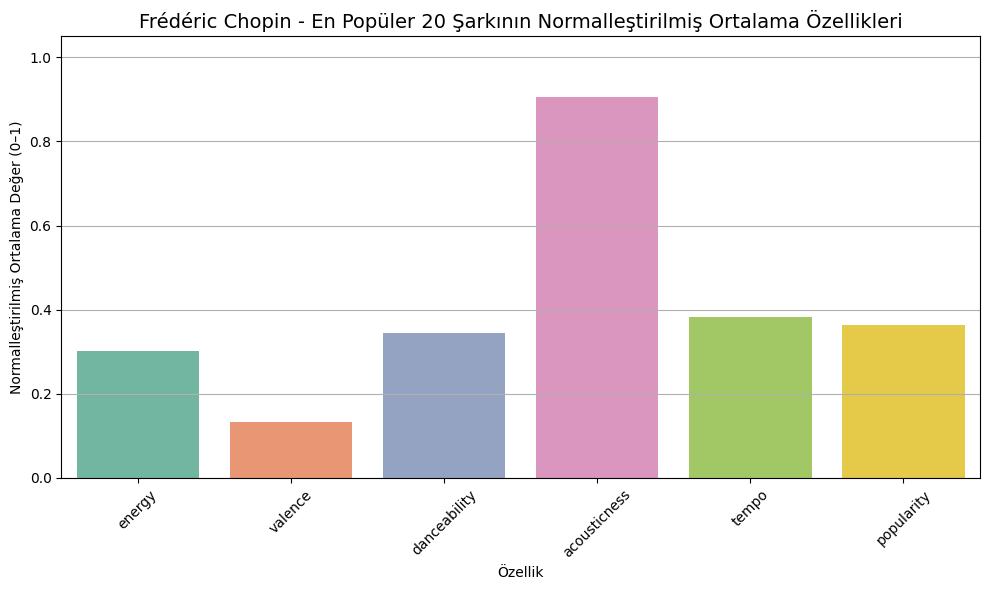

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


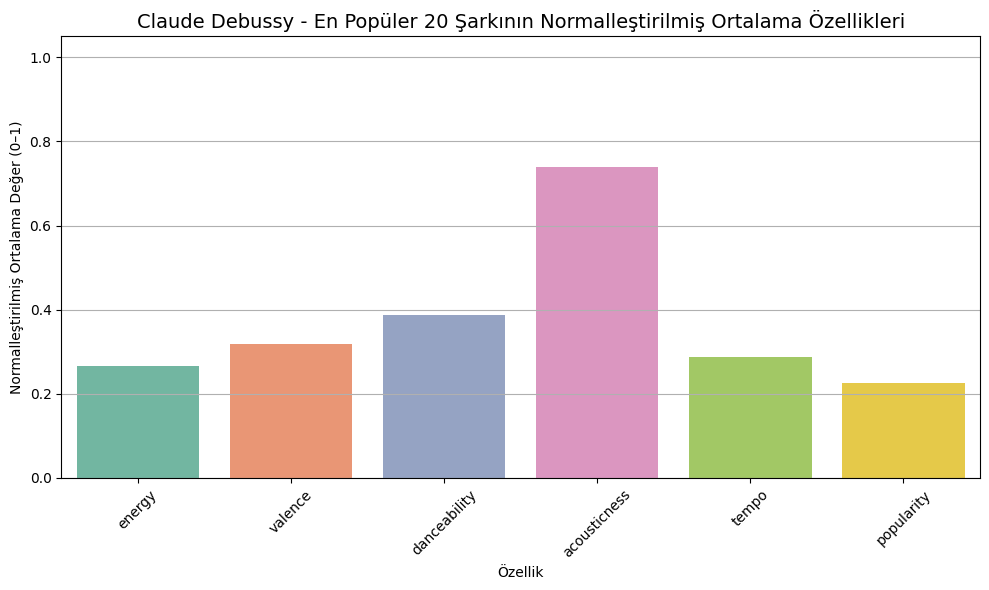

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


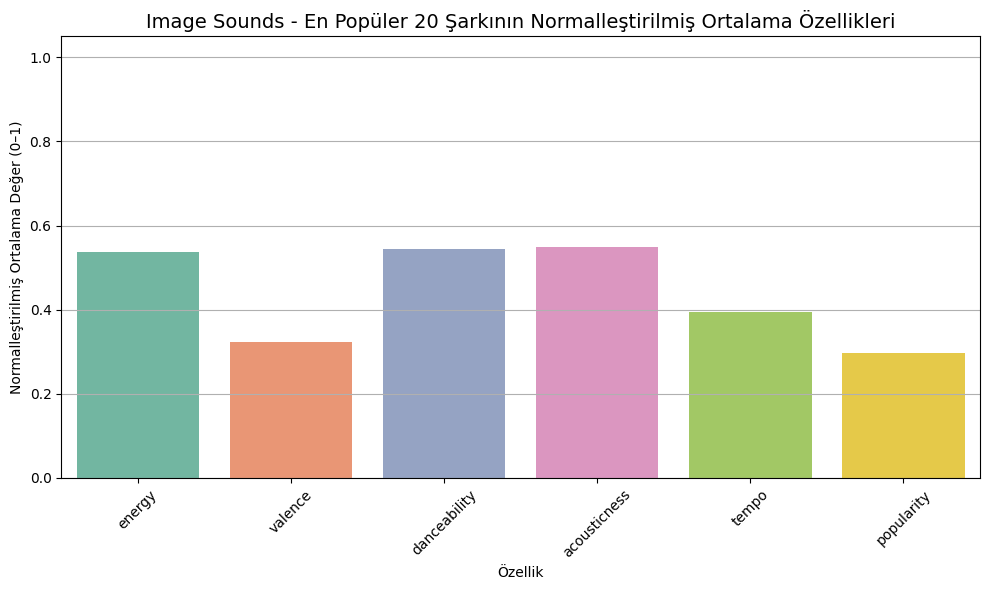

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


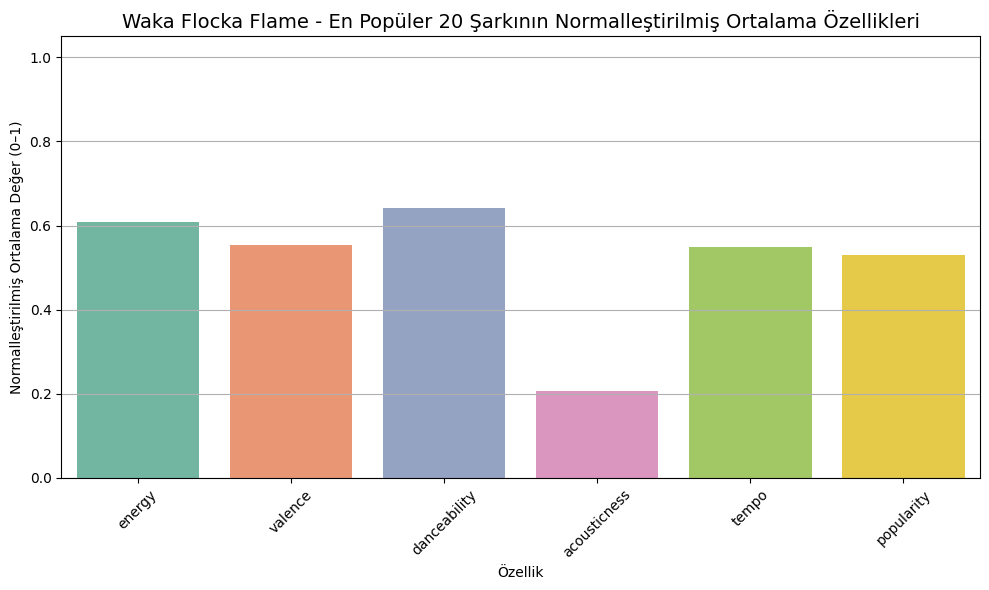

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


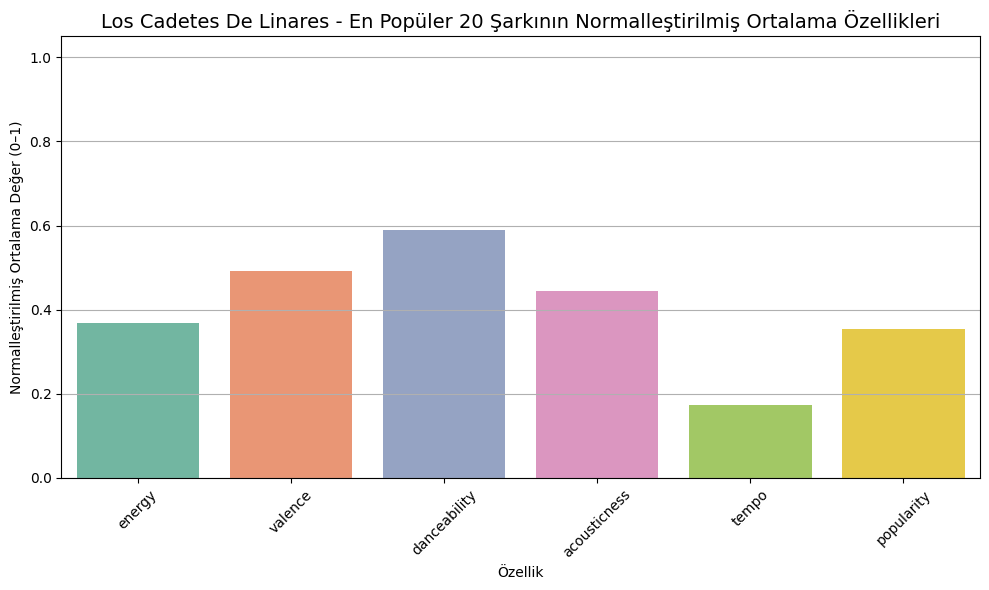

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


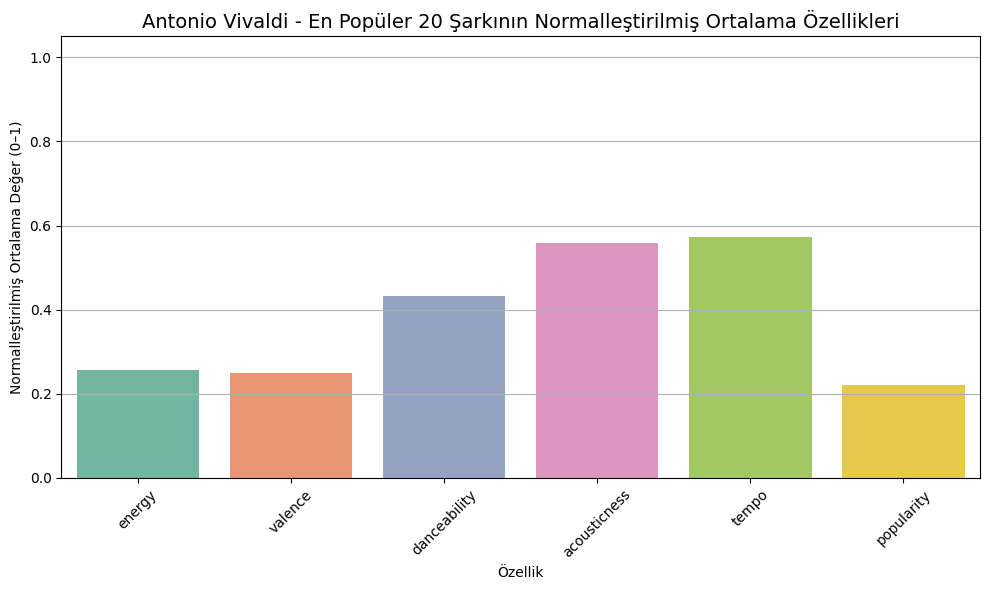

In [10]:
from sklearn.preprocessing import MinMaxScaler


# 📊 En çok şarkıya sahip 10 sanatçıyı seç (popülerlik değil, şarkı sayısı bazında)
top_artists = df['artist_name'].value_counts().head(10).index

# 🎯 Kullanılacak özellikler
features = ['energy', 'valence', 'danceability', 'acousticness', 'tempo', 'popularity']

# 🔁 Her sanatçı için analiz yap
for artist in top_artists:
    # 🎵 Sanatçının verisini al
    artist_df = df[df['artist_name'] == artist]
    
    # 🔝 En popüler 20 şarkısını seç
    top_songs = artist_df.sort_values(by='popularity', ascending=False).head(20)

    # 🎛 Normalizasyon
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(top_songs[features])
    normalized_df = pd.DataFrame(normalized, columns=features)

    # 📊 Ortalama değerleri al
    mean_values = normalized_df.mean()

    # 📈 Grafik çiz
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")
    plt.title(f"{artist} - En Popüler 20 Şarkının Normalleştirilmiş Ortalama Özellikleri", fontsize=14)
    plt.xlabel("Özellik")
    plt.ylabel("Normalleştirilmiş Ortalama Değer (0–1)")
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [11]:
# Veriyi oku
df = pd.read_csv("C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv")

# Kullanılacak özellikler
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'liveness', 'loudness', 'speechiness',
            'tempo', 'valence', 'popularity']

# En çok şarkıya sahip 10 sanatçıyı seç
top_artists = df['artist_name'].value_counts().head(10).index

# Her sanatçı için korelasyonları tutacak sözlük
correlations = {}

for artist in top_artists:
    artist_df = df[df['artist_name'] == artist]
    top_songs = artist_df.sort_values(by='popularity', ascending=False).head(20)

    # Normalize et
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(top_songs[features])
    normalized_df = pd.DataFrame(normalized, columns=features)

    # Popülerlik ile diğer özellikler arasındaki korelasyon
    corr_series = normalized_df.corr()['popularity'].drop('popularity')
    correlations[artist] = corr_series

# DataFrame'e çevir
correlation_df = pd.DataFrame(correlations).T

# Sonuçları yazdır
print("\n🎯 POPÜLERLİK İLE ÖZELLİKLERİN KORELASYONLARI (10 SANATÇI)\n")
print(correlation_df.round(3))

# Ortalama korelasyonu hesapla
mean_corr = correlation_df.mean().sort_values(ascending=False)
print("\n📌 Ortalama Korelasyonlar (Popülerliği etkileyen özellikler):\n")
print(mean_corr.round(3))



🎯 POPÜLERLİK İLE ÖZELLİKLERİN KORELASYONLARI (10 SANATÇI)

                         acousticness  danceability  duration_ms  energy  \
Johann Sebastian Bach           0.579         0.178        0.232   0.360   
Wolfgang Amadeus Mozart         0.170        -0.038        0.084   0.159   
Armin van Buuren               -0.252        -0.007        0.522   0.006   
Ludwig van Beethoven            0.058        -0.067       -0.295  -0.066   
Frédéric Chopin                 0.149         0.015        0.393  -0.044   
Claude Debussy                  0.065        -0.231        0.149  -0.096   
Image Sounds                   -0.072        -0.321       -0.226  -0.096   
Waka Flocka Flame              -0.063         0.451       -0.296  -0.263   
Los Cadetes De Linares          0.023         0.093        0.240  -0.089   
Antonio Vivaldi                 0.375         0.505       -0.026   0.485   

                         instrumentalness  liveness  loudness  speechiness  \
Johann Sebastian Bach    

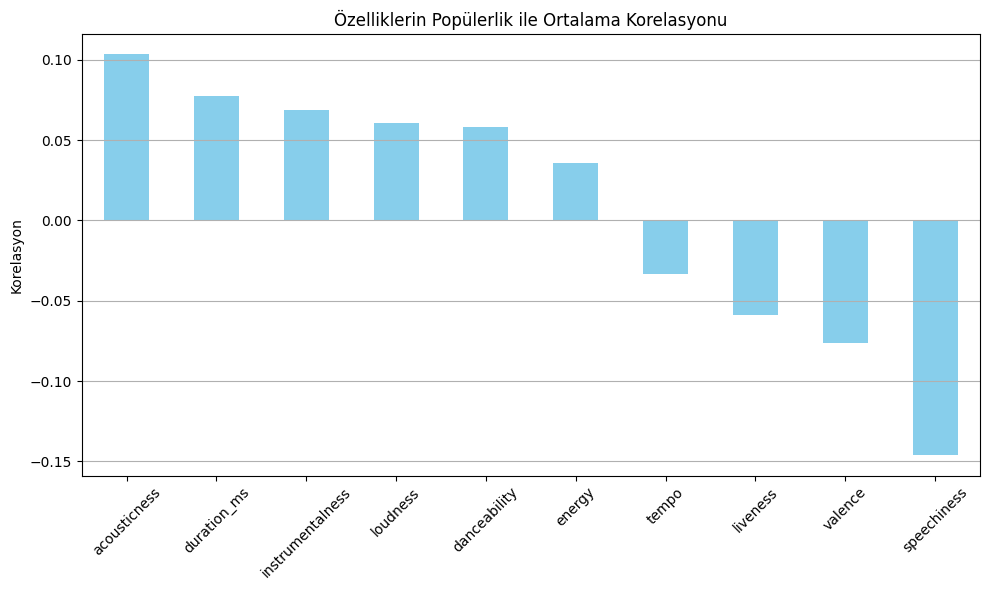

In [12]:
# Bar grafiği ile genel korelasyonları gör
plt.figure(figsize=(10,6))
mean_corr.plot(kind='bar', color='skyblue')
plt.title("Özelliklerin Popülerlik ile Ortalama Korelasyonu")
plt.ylabel("Korelasyon")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


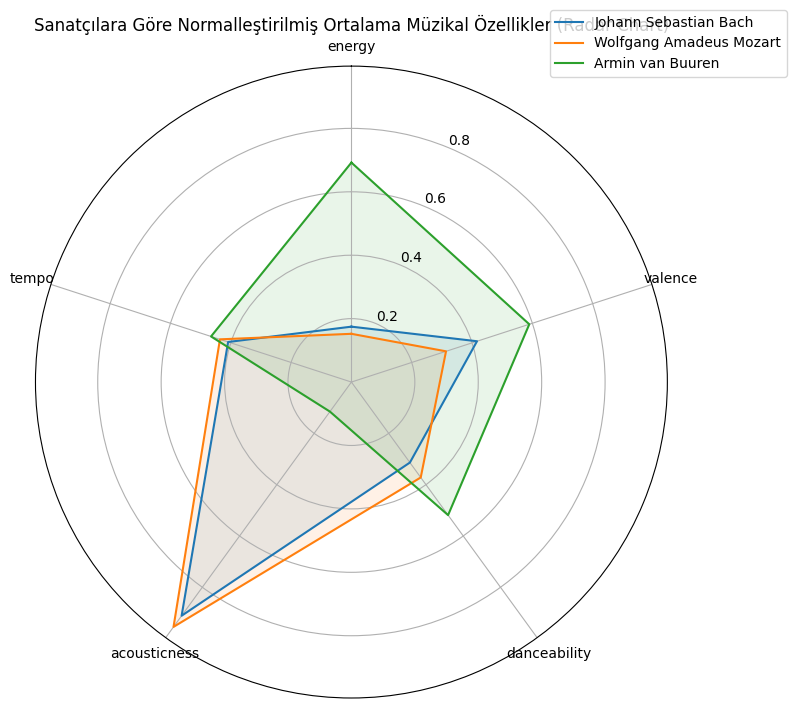

In [13]:
# Veriyi oku
df = pd.read_csv("C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv")

# Kullanılacak özellikler
features = ['energy', 'valence', 'danceability', 'acousticness', 'tempo']

# Tüm veriyi normalleştir (0-1 arası)
df_norm = df.copy()
for feature in features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    df_norm[feature] = (df[feature] - min_val) / (max_val - min_val)

# Sanatçı bazında ortalama al
artist_avg = df_norm.groupby('artist_name')[features].mean()

# En çok şarkısı olan 3 sanatçıyı al
top_artists = df['artist_name'].value_counts().head(3).index.tolist()

# Radar grafiği için açıları oluştur
labels = features
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Başlangıç noktasını kapatmak için ilk açıyı tekrar ekle

# Grafik ayarları
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her sanatçı için çizim yap
for artist in top_artists:
    values = artist_avg.loc[artist].tolist()
    values += values[:1]  # Kapatmak için ilk değeri sona ekle
    ax.plot(angles, values, label=artist)
    ax.fill(angles, values, alpha=0.1)

# Görsel ayarlar
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Sanatçılara Göre Normalleştirilmiş Ortalama Müzikal Özellikler (Radar Chart)")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


In [14]:
# Belirli eşiklerle alışılmışın dışında popüler olanları bul
unusual_hits = df[(df['energy'] < 0.4) & (df['popularity'] > 80)]
print(unusual_hits[['artist_name', 'track_name', 'energy', 'popularity']].sort_values(by='popularity', ascending=False))


            artist_name                                         track_name  \
124042        Lady Gaga                                            Shallow   
99372     Ariana Grande                                            7 rings   
99363           J. Cole                                       MIDDLE CHILD   
99379     Billie Eilish                                      bury a friend   
123895    Billie Eilish                               lovely (with Khalid)   
99374     Billie Eilish                                  wish you were gay   
101723  Sebastian Yatra                                             Un Año   
125381         Blueface                                           Thotiana   
99376     Billie Eilish                                              xanny   
99378     Billie Eilish                               my strange addiction   
99381     Billie Eilish                                         i love you   
99385     Billie Eilish                                 listen b

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Özellikleri ve hedefi seç
features = ['energy', 'valence', 'danceability', 'acousticness', 'tempo']
X = df[features].dropna()
y = df.loc[X.index, 'popularity']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeli eğit
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinden tahmin ve skor
y_pred = model.predict(X_test)
print("R2 Skoru:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Özellik önem dereceleri
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nÖzellik Önem Dereceleri:\n", importances)


R2 Skoru: 0.06165221052625525
RMSE: 19.079260123447987


C:\Users\Tuna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Özellik Önem Dereceleri:
 tempo           0.207729
acousticness    0.206299
energy          0.200825
valence         0.193690
danceability    0.191456
dtype: float64


In [16]:
# Veri setinden rastgele bir satır seç (popülerlik hariç)
random_index = np.random.choice(X.index)
sample_features = X.loc[random_index].values.reshape(1, -1)
true_popularity = y.loc[random_index]

# Seçilen örneği ölçeklendir
sample_scaled = scaler.transform(sample_features)

# Tahmin yap
predicted_popularity = model.predict(sample_scaled)[0]

# Sonuçları yazdır
print(f"Rastgele seçilen şarkı özellikleri: {X.loc[random_index].to_dict()}")
print(f"Gerçek popülerlik değeri: {true_popularity}")
print(f"Tahmin edilen popülerlik değeri: {predicted_popularity:.2f}")


Rastgele seçilen şarkı özellikleri: {'energy': 0.82, 'valence': 0.0623, 'danceability': 0.4529999999999999, 'acousticness': 4.85e-05, 'tempo': 136.985}
Gerçek popülerlik değeri: 15
Tahmin edilen popülerlik değeri: 15.68


C:\Users\Tuna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              artist_name                  track_name  anomaly_score  \
125400        Max Richter   A Catalogue Of Afternoons      10.173859   
120590    Steven Goldmund            Enter the Unseen       9.385456   
125024         Primer Dia            Floating, Always       9.373966   
126349         Masala Roo          Pads of Redemption       9.241666   
99392       Billie Eilish                     goodbye       8.990831   
121906    Elise Magnefold                    Heavenly       8.775545   
101891         Primer Dia                    Daenerys       8.764204   
124966         Primer Dia              Astral Therapy       8.759958   
121016       Dream Runner                      Magica       8.752499   
120958            Tedosio             The Book of Jen       8.643076   
101878         Deep Watch           Reasons For Being       8.536609   
115452    Steven Goldmund                  Mind-Drift       8.518200   
102063       Kina Grannis  Can't Help Falling In Love       8.45

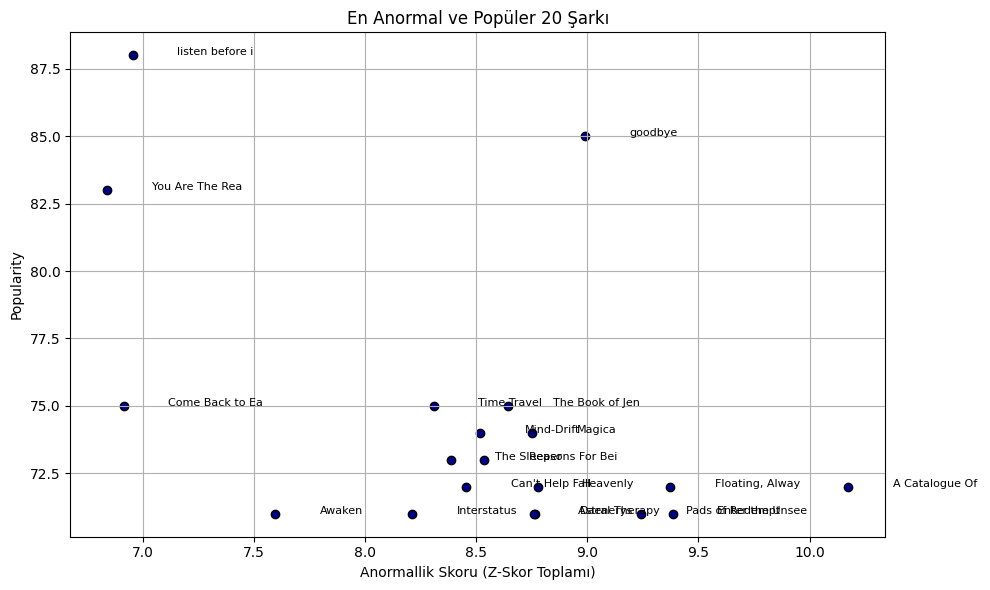

In [17]:
# Veriyi yükle
df = pd.read_csv("C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv")

# Kullanılacak müziksel özellikler
features = ['energy', 'valence', 'danceability', 'acousticness', 'tempo']

# Z-score hesaplama
df_z = df[features].apply(zscore)

# Toplam anormallik skorunu hesapla
df['anomaly_score'] = df_z.abs().sum(axis=1)

# Koşul: daha esnek bir eşik + popülerlik
anomaly_threshold = 6
popularity_threshold = 70
unusual_hits = df[(df['anomaly_score'] > anomaly_threshold) & (df['popularity'] > popularity_threshold)]

# En yüksek anormallik skoruna sahip 20 şarkıyı al
top_unusual_hits = unusual_hits.sort_values(by='anomaly_score', ascending=False).head(20)

# Terminal çıktısı
print(top_unusual_hits[['artist_name', 'track_name', 'anomaly_score', 'popularity']])

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(top_unusual_hits['anomaly_score'], top_unusual_hits['popularity'], c='darkblue', edgecolor='black')
plt.title("En Anormal ve Popüler 20 Şarkı")
plt.xlabel("Anormallik Skoru (Z-Skor Toplamı)")
plt.ylabel("Popularity")
plt.grid(True)

# Etiket (şarkı adları) ekle
for i, row in top_unusual_hits.iterrows():
    plt.text(row['anomaly_score'] + 0.2, row['popularity'], row['track_name'][:15], fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules

# CSV dosyasını oku (veri yolunu kendi bilgisayarındakiyle değiştir)
file_path = "C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv"
df = pd.read_csv(file_path)

# İsteğe bağlı: ilk birkaç satıra bak
print(df.head())

# -----------------------------------------
# ADIM 1: Şarkı Özelliklerinden Etiketler Üret
# -----------------------------------------

def create_music_labels(row):
    labels = []
    if row['energy'] > 0.7:
        labels.append('high_energy')
    if row['acousticness'] > 0.8:
        labels.append('acoustic')
    if row['danceability'] > 0.7:
        labels.append('dance_hit')
    if row['valence'] > 0.6:
        labels.append('happy')
    if row['valence'] < 0.3:
        labels.append('sad')
    if row['instrumentalness'] > 0.9:
        labels.append('instrumental')
    if row['speechiness'] > 0.66:
        labels.append('speech')
    return labels

df['labels'] = df.apply(create_music_labels, axis=1)

# -----------------------------------------
# ADIM 2: Etiketleri One-Hot Encoding'e Çevir
# -----------------------------------------

mlb = MultiLabelBinarizer()
label_matrix = mlb.fit_transform(df['labels'])
df_encoded = pd.DataFrame(label_matrix, columns=mlb.classes_)

# -----------------------------------------
# ADIM 3: Apriori ile Sık Öğe Kümelerini Bul
# -----------------------------------------

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)

print("\nSık geçen öğe kümeleri:\n")
print(frequent_itemsets.head())

# -----------------------------------------
# ADIM 4: Birliktelik Kurallarını Üret
# -----------------------------------------

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by='confidence', ascending=False)

print("\nBirliktelik Kuralları:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Etiketleri oluşturduktan sonra...
mlb = MultiLabelBinarizer()
label_matrix = mlb.fit_transform(df['labels'])
df_encoded = pd.DataFrame(label_matrix, columns=mlb.classes_)

# 🔄 3 ve 4 öğeli kombinasyonları da alacak şekilde apriori çalıştır
frequent_itemsets = apriori(df_encoded,
                            min_support=0.01,
                            use_colnames=True,
                            max_len=4)  # ← burada 4'e kadar kombinasyon üretilecek

# Her kombinasyonun kaçlı olduğunu ekleyelim
frequent_itemsets['itemset_len'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# 🧪 3'lü kombinasyonları gör
print("\n3 öğeden oluşan sık itemset'ler:\n")
print(frequent_itemsets[frequent_itemsets['itemset_len'] == 3].sort_values(by='support', ascending=False).head())

# 🧪 4'lü kombinasyonları gör
print("\n4 öğeden oluşan sık itemset'ler:\n")
print(frequent_itemsets[frequent_itemsets['itemset_len'] == 4].sort_values(by='support', ascending=False).head())


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sayısal sütunları ayır (örneğin: artist_name, track_id, track_name gibi metin sütunlarını çıkar)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Sayısal veriyi ölçekle (ölçü birimlerini eşitlemek için)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# KMeans kümeleme (4 küme örnek olarak)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Sadece sayısal sütunları seç
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Küme bazında ortalama değerleri al
cluster_means = df.groupby("Cluster")[numeric_cols].mean()

# Sonuçları yazdır
print(cluster_means)
